In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

# Run the installation commands
!pip install opendatasets
!pip install ultralytics
!pip install pytubefix

# Clean up the notebook
clean_notebook()



Notebook cleaned.


In [1]:

import ultralytics
ultralytics.checks()

Ultralytics 8.3.89 🚀 Python-3.12.3 torch-2.8.0.dev20250313+cu128 CUDA:0 (NVIDIA GeForce RTX 5090, 32098MiB)
Setup complete ✅ (32 CPUs, 62.3 GB RAM, 153.9/1455.6 GB disk)


# Yolo 11 with Video files

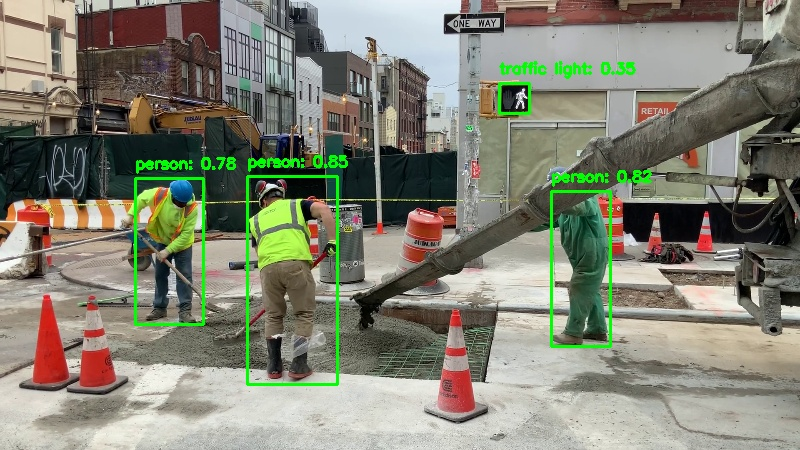

In [ ]:
import cv2
from IPython.display import display, Image, clear_output
from ultralytics import YOLO

# Set the desired width for resizing frames
set_width = 800

# Load the YOLO model
model = YOLO("yolo11n.pt")

# Class names (ensure these match your model's training dataset, e.g., COCO)
# You may need to adjust this list based on the specific model used.
class_names = model.names  # Assuming `model.names` provides the class name mapping

# Initialize video capture (0 for webcam, or provide a video file path)
video_path = ".././Videos/video4.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f"Error: Could not open video source: {video_path}")
    cap.release()
    raise RuntimeError("Video initialization failed.")

try:
    while True:
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            print("End of video or failed to grab frame.")
            break
        
        # Resize the frame for faster processing
        ratio = set_width / frame.shape[1]
        frame = cv2.resize(frame, (set_width, int(frame.shape[0] * ratio)))

        # Run YOLO inference on the frame
        results = model.predict(frame, verbose=False)

        # Draw bounding boxes and labels on the frame
        for result in results:
            boxes = result.boxes
            for box in boxes:
                # Extract bounding box coordinates
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                
                # Draw rectangle
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

                # Get class ID and confidence
                class_id = int(box.cls[0]) if hasattr(box.cls, '__iter__') else int(box.cls)
                confidence = float(box.conf[0]) if hasattr(box.conf, '__iter__') else float(box.conf)

                # Get class name
                class_name = class_names[class_id] if class_id < len(class_names) else f"ID {class_id}"

                # Create label text
                label = f"{class_name}: {confidence:.2f}"
                cv2.putText(frame, label, (x1, y1 - 10), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Encode the frame as JPEG
        _, buffer = cv2.imencode('.jpg', frame)
        img_bytes = buffer.tobytes()

        # Display the frame inline in the notebook
        display(Image(data=img_bytes))
        clear_output(wait=True)
finally:
    cap.release()


# To display only bounding boxes and labels for specific classes of interest

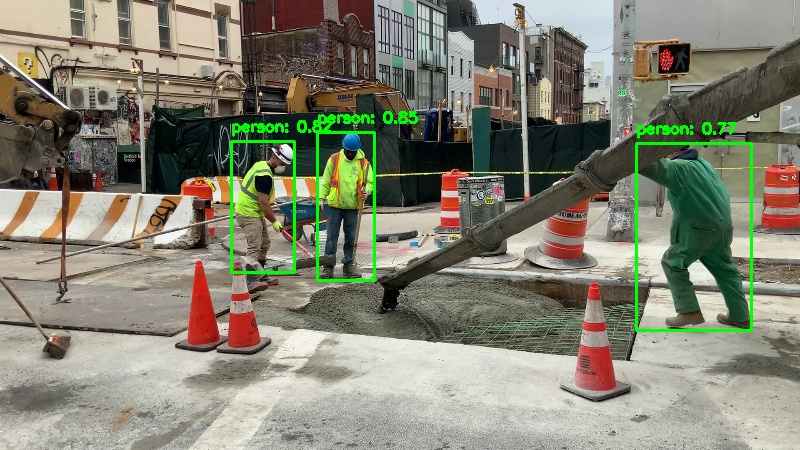

In [ ]:
import cv2
from IPython.display import display, Image, clear_output
from ultralytics import YOLO

# Set the desired width for resizing frames
set_width = 800

# Specify the labels of interest
labels_of_interest = {"person", "cat"}



# Load the YOLO model
model = YOLO("yolo11n.pt")

# Class names (ensure these match your model's training dataset, e.g., COCO)
# You may need to adjust this list based on the specific model used.
class_names = model.names  # Assuming `model.names` provides the class name mapping


# Initialize video capture (0 for webcam, or provide a video file path)
video_path = ".././Videos/video4.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f"Error: Could not open video source: {video_path}")
    cap.release()
    raise RuntimeError("Video initialization failed.")

try:
    while True:
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            print("End of video or failed to grab frame.")
            break
        
        # Resize the frame for faster processing
        ratio = set_width / frame.shape[1]
        frame = cv2.resize(frame, (set_width, int(frame.shape[0] * ratio)))

        # Run YOLO inference on the frame
        results = model.predict(frame, verbose=False)

        # Draw bounding boxes and labels on the frame
        for result in results:
            boxes = result.boxes
            for box in boxes:
                # Extract bounding box coordinates
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                
                # Get class ID and confidence
                class_id = int(box.cls[0]) if hasattr(box.cls, '__iter__') else int(box.cls)
                confidence = float(box.conf[0]) if hasattr(box.conf, '__iter__') else float(box.conf)

                # Get class name
                class_name = class_names[class_id] if class_id < len(class_names) else f"ID {class_id}"

                # Skip if class name is not in labels of interest
                if class_name not in labels_of_interest:
                    continue

                # Draw rectangle
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

                # Create label text
                label = f"{class_name}: {confidence:.2f}"
                cv2.putText(frame, label, (x1, y1 - 10), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Encode the frame as JPEG
        _, buffer = cv2.imencode('.jpg', frame)
        img_bytes = buffer.tobytes()

        # Display the frame inline in the notebook
        display(Image(data=img_bytes))
        clear_output(wait=True)
finally:
    cap.release()


# To integrate reading a YouTube stream with YOLO object detection

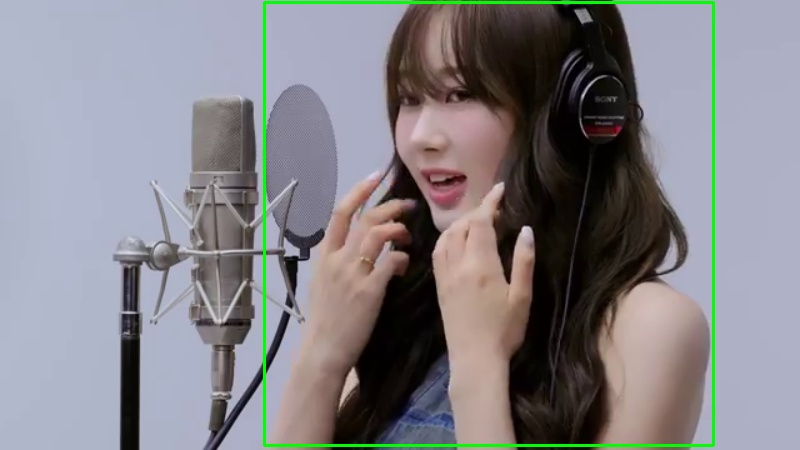

In [ ]:
import cv2
from IPython.display import display, Image, clear_output
from pytubefix import YouTube
from ultralytics import YOLO

# Set the desired width for resizing frames
set_width = 800

# Specify the labels of interest
labels_of_interest = {"person", "cat"}

# Load the YOLO model
model = YOLO("yolo11n.pt")

# Class names (ensure these match your model's training dataset, e.g., COCO)
class_names = model.names  # Assuming `model.names` provides the class name mapping

# YouTube video URL
video_url = "https://youtu.be/EsHQB9gT96k?si=bdi3dDrVnYVIgVYi"

# Fetch the video stream URL using pytube
yt = YouTube(video_url)
video_stream = yt.streams.filter(file_extension='mp4', progressive=True).first()

if not video_stream:
    print("No compatible video stream found.")
    raise RuntimeError("Failed to fetch video stream.")

# Get the stream URL
stream_url = video_stream.url

# Open the YouTube stream in OpenCV
cap = cv2.VideoCapture(stream_url)

if not cap.isOpened():
    print(f"Error: Could not open YouTube video stream.")
    cap.release()
    raise RuntimeError("Video initialization failed.")

try:
    while True:
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            print("End of video or failed to grab frame.")
            break

        # Resize the frame for faster processing
        ratio = set_width / frame.shape[1]
        frame = cv2.resize(frame, (set_width, int(frame.shape[0] * ratio)))

        # Run YOLO inference on the frame
        results = model.predict(frame, verbose=False)

        # Draw bounding boxes and labels on the frame
        for result in results:
            boxes = result.boxes
            for box in boxes:
                # Extract bounding box coordinates
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                
                # Get class ID and confidence
                class_id = int(box.cls[0]) if hasattr(box.cls, '__iter__') else int(box.cls)
                confidence = float(box.conf[0]) if hasattr(box.conf, '__iter__') else float(box.conf)

                # Get class name
                class_name = class_names[class_id] if class_id < len(class_names) else f"ID {class_id}"

                # Skip if class name is not in labels of interest
                if class_name not in labels_of_interest:
                    continue

                # Draw rectangle
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

                # Create label text
                label = f"{class_name}: {confidence:.2f}"
                cv2.putText(frame, label, (x1, y1 - 10), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Encode the frame as JPEG
        _, buffer = cv2.imencode('.jpg', frame)
        img_bytes = buffer.tobytes()

        # Display the frame inline in the notebook
        display(Image(data=img_bytes))
        clear_output(wait=True)
finally:
    cap.release()
